<a href="https://colab.research.google.com/github/TAUforPython/wavelets/blob/main/DFT_and_CFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

пример сравнения непрерывного и дискретного преобразования сигнала

https://dspillustrations.com/pages/posts/misc/approximating-the-fourier-transform-with-dft.html

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import scipy

In [74]:
def cft(g, f):
    """Numerically evaluate the Fourier Transform of g for the given frequencies"""
    result = np.zeros(len(f), dtype=complex)

    # Loop over all frequencies and calculate integral value
    for i, ff in enumerate(f):
        # Evaluate the Fourier Integral for a single frequency ff,
        # assuming the function is time-limited to abs(t)<5

        result[i] = complex_quad(lambda t: g(t)*np.exp(-2j*np.pi*ff*t), -5, 5)
        #result[i] = integrate.quad(lambda t: g(t)*np.exp(-2j*np.pi*ff*t), -5, 5, complex_func=True)
    return result

def complex_quad(g, a, b):
    """Return definite integral of complex-valued g from a to b,
    using Simpson's rule"""
    # 2501: Amount of used samples for the trapezoidal rule
    t = np.linspace(a, b, 2501)
    x = g(t)
    return integrate.simps(y=x, x=t)

def rect(t):
    return ((t) > 0.5).astype(float)

<ipython-input-69-3e203dee62cd>:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return integrate.simps(y=x, x=t)


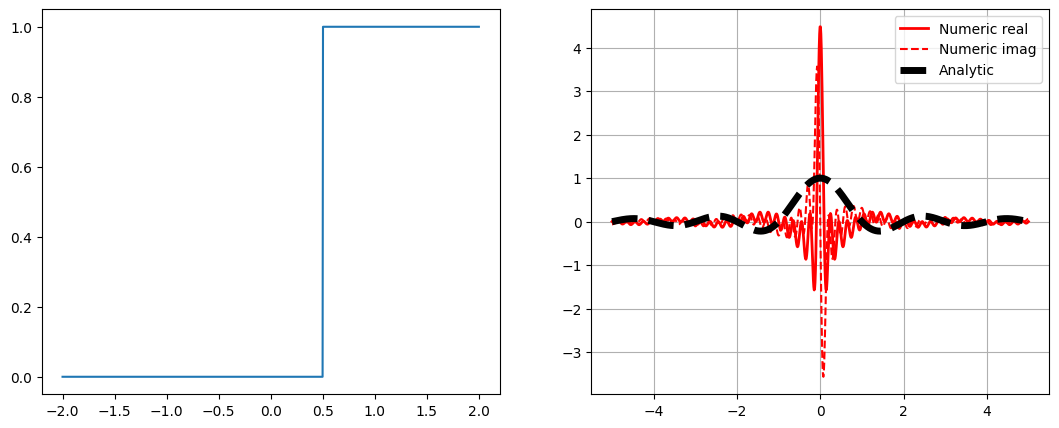

In [70]:
t = np.linspace(-2,2, 1000)
f = np.linspace(-5, 5, 1000)
R = cft(rect, f)  # Calculate the numeric Fourier Transform of the rect function

fig, axs = plt.subplots(1,2,figsize=(13,5))

axs[0].plot(t, rect(t))
axs[1].plot(f, R.real, 'r-', lw=2, label='Numeric real')
axs[1].plot(f, R.imag, 'r--', label='Numeric imag')
axs[1].plot(f, np.sin(np.pi*f)/(np.pi*f), 'k--', lw=5, label='Analytic')
plt.legend()
plt.grid()
plt.show()

<ipython-input-74-94bb0b75f51c>:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return integrate.simps(y=x, x=t)


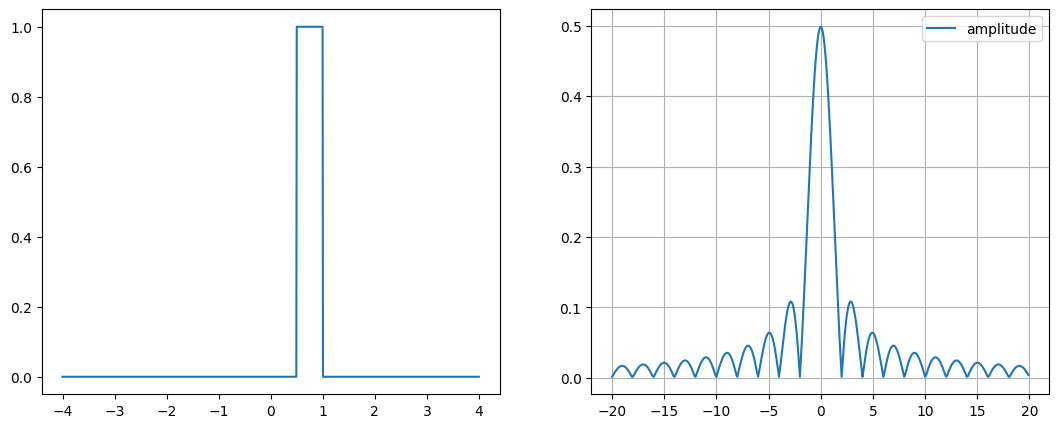

In [75]:
g = lambda t: (rect(t) - rect(t-0.5)) #* np.exp(-t*t)  # define the function
t0 = 4
f_full = np.arange(-20, 20, 0.1)
t_full = np.linspace(-t0, t0, 1000)
G_exact = cft(g, f_full)  # calculate Fourier Transform of the function

fig, axs = plt.subplots(1,2,figsize=(13,5))
axs[0].plot(t_full, g(t_full))
axs[1].plot(f_full, abs(G_exact), label='amplitude')
plt.legend()
plt.grid()
plt.show()

In [76]:
def compareCFTandDFT(Fs):
    t = np.arange(-t0, t0, 1./Fs)
    f = np.linspace(-Fs/2, Fs/2, len(t), endpoint=False)
    # Calculate the approximate Fourier Transform according to the derived rule.
    G_approx = np.fft.fftshift(np.fft.fft(g(t)) * np.exp(-2j*np.pi*f*t0) * 1/Fs)
    return G_approx, f

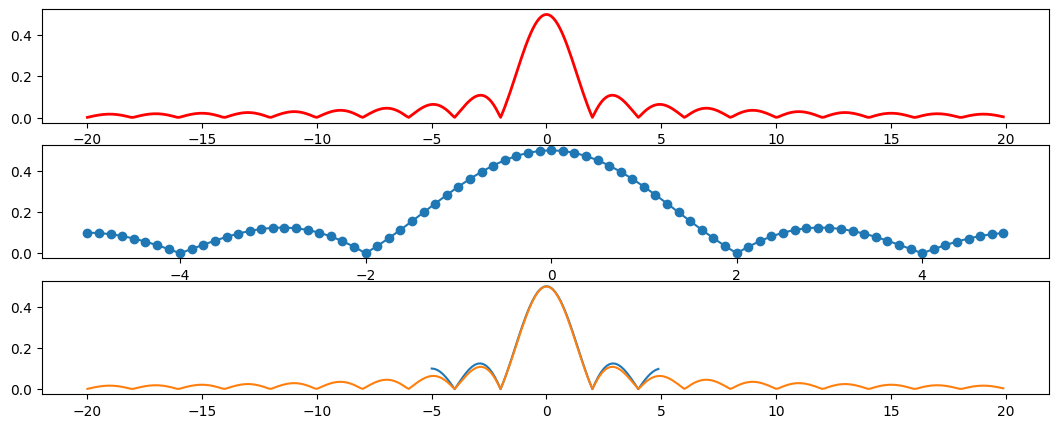

In [77]:
Fs = 10
(G_approx, f) = compareCFTandDFT(Fs=Fs)

fig, axs = plt.subplots(3,1,figsize=(13,5))
axs[0].plot(f_full, abs(G_exact), 'r-', lw=2)
axs[1].plot(f, abs(G_approx), 'o-')
axs[2].plot(f, abs(G_approx),f_full,abs(G_exact))

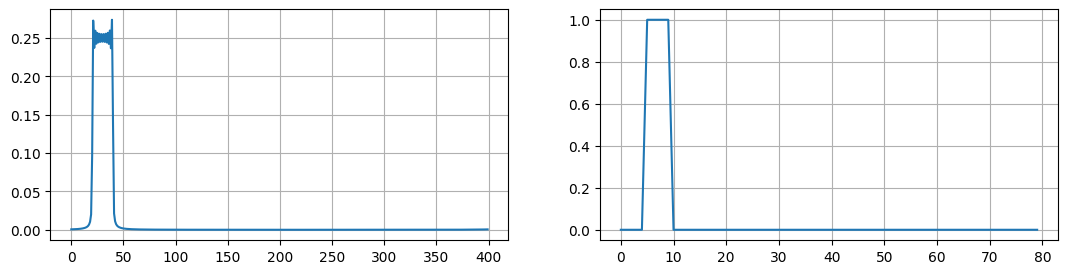

In [80]:
y_ifft_exact = np.fft.ifft(G_exact)
y_ifft_approx = np.fft.ifft(G_approx)

fig, axs = plt.subplots(1,2,figsize=(13,3))
axs[0].plot(abs(y_ifft_exact)*Fs)
axs[1].plot(abs(y_ifft_approx)*Fs)
axs[0].grid()
axs[1].grid()
plt.show()

# Аналитическая формула преобразования Фурье

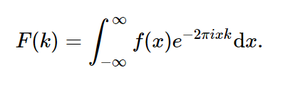

In [82]:
from sympy import fourier_transform, exp, sin, cos
from sympy.abc import x, k

# Using fourier_transform() method
gfg = fourier_transform(exp(-x**2), x, k, noconds = False)
print(gfg)

(sqrt(pi)*exp(-pi**2*k**2), True)


In [85]:
import sympy

In [86]:
i2pi = sympy.I*2*sympy.pi
exp = sympy.exp
def S(N):
    return sum(c(n)*exp(i2pi*n*t/P) for n in range(-N, N+1)).expand(complex=True).simplify()

def c(n):
    return (sympy.integrate(
               f(t)*exp((-i2pi * n * t)/P),
               (t, t0, t0 + P))/P)
def f(t):
    return t

In [87]:
P = 20
t0 = -10
N = 7

In [88]:
t = sympy.Symbol('t', real=True)

In [89]:
analytic_approx = S(N).expand()
analytic_approx

20*sin(pi*t/10)/pi - 10*sin(pi*t/5)/pi + 20*sin(3*pi*t/10)/(3*pi) - 5*sin(2*pi*t/5)/pi + 4*sin(pi*t/2)/pi - 10*sin(3*pi*t/5)/(3*pi) + 20*sin(7*pi*t/10)/(7*pi)

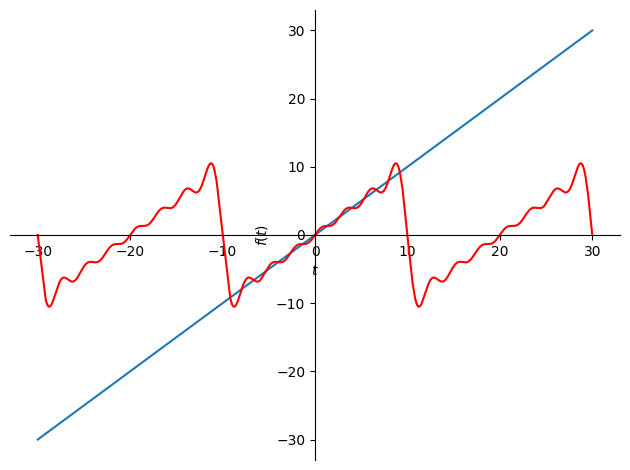

In [ ]:
interval = (t, t0-P, t0+2*P)
p1 = sympy.plot(f(t), interval, show=False)
p2 = sympy.plot(analytic_approx, interval, show=False)
p2[0].line_color = 'red'
p1.extend(p2)
p1.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# гармонический детерминированный сигнал
# число точек в выборке
N = 300
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0 #5 секунд
t = np.linspace(0.0, T, N)

y = 1 * np.sin(1.0 * 2.0*np.pi*t) + 2 * np.sin(12.0 * 2.0*np.pi*t) + 0.5*np.sin(3.0 * 2.0*np.pi*t)
#y = np.cos(1.0 * 2.0*np.pi*t) + t

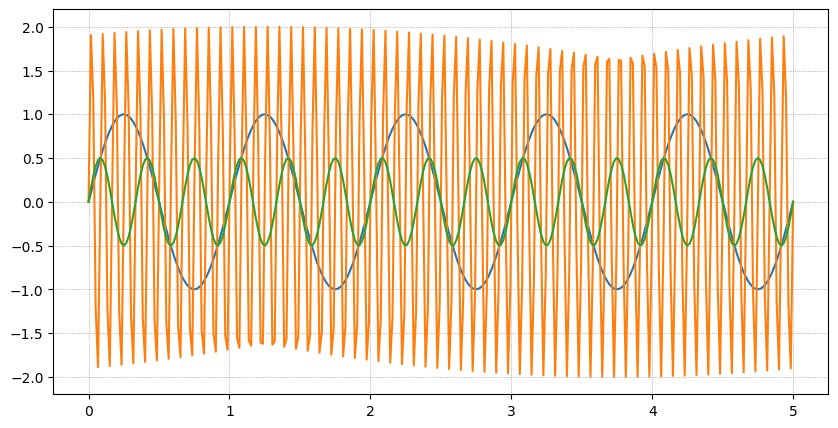

In [ ]:
# Визуализация трех гармонических сигналов
plt.figure(figsize=(10, 5))
plt.plot(t, np.sin(1.0 * 2.0*np.pi*t), t, 2*np.sin(12.0 * 2.0*np.pi*t), t, 0.5*np.sin(3.0 * 2.0*np.pi*t))
#plt.plot(t, y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

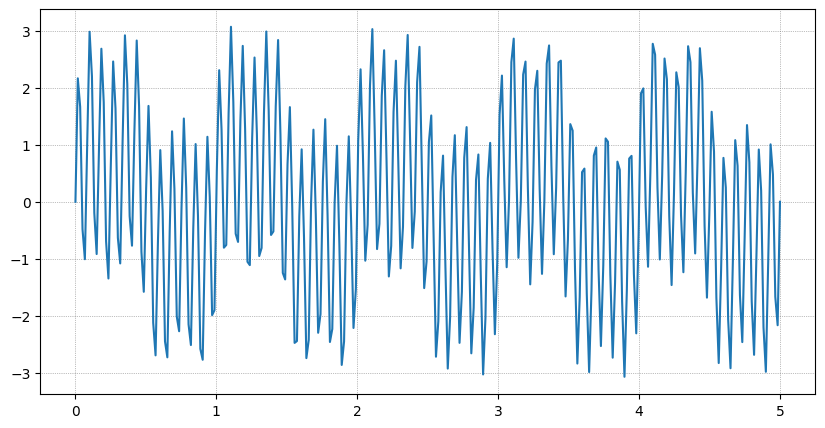

In [ ]:
# Визуализация трех гармонических сигналов
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

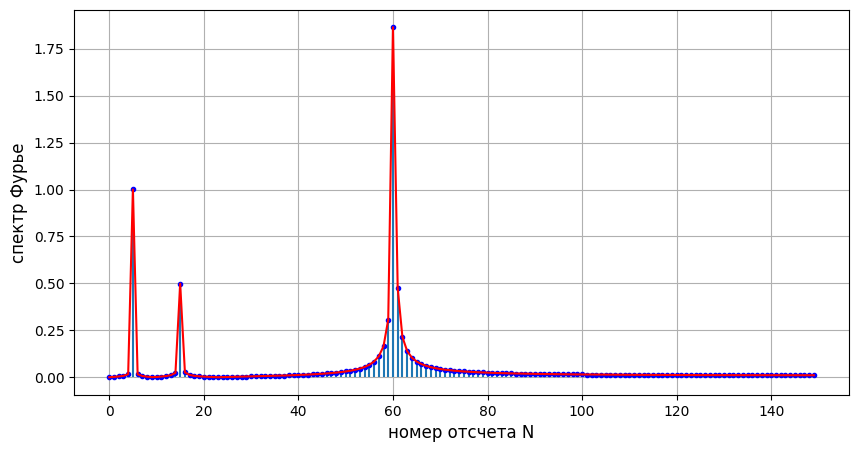

In [ ]:
from scipy.fft import fft, fftfreq

yf = fft(y)[:N//2]
# берем половину спектра - всего N значений
# половину берем потому, что спект симметричный относительно оси y
plt.figure(figsize=(10, 5))
plt.xlabel('номер отсчета N', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
plt.grid()
plt.stem(abs(yf)/N*2, markerfmt = 'b.', basefmt=" ")
plt.plot(abs(yf)/N*2, color = 'red')
plt.show()
# спектр отнормализуем на величину N и умножим на 2
# так как половину c отрицательной оси мы откинули

Спектрограмма построена относительно отсчетов. Всего отсчетов N.

Индекс отсчета i.
Итого преобразование Фурье зависит от f_i = i / N * k

x_{fft}[k] = \displaystyle\sum_{i=0}^{N-1} exp^{ - 2\pi j \frac{i} {N} k} x[k]

Итого: 2π/N - это параметр нормализации частоты


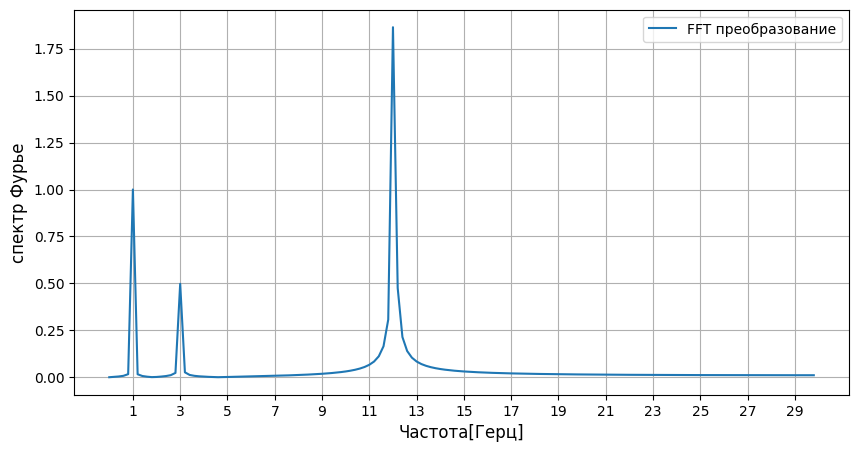

In [ ]:
# перейдем от отсчетов N к частотам
xf = fftfreq(N, T/N)[:N//2]
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть
plt.figure(figsize=(10, 5))
plt.plot(xf, np.abs(yf[0:N//2])/N*2,label='FFT преобразование')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
plt.xticks(np.arange(1, np.max(xf), 2))
plt.grid()
plt.legend()
plt.show()

вот так выглядит "скаллограмма"
сигнал у(t) содержит N точек
"Частота Найквиста" = 1/N



In [ ]:
print(' Число точек в сигнале =',len(y),
      '\n Длительность времени сигнала =',T,'секунд'
      '\n Частота Найквиста', 1/len(y)*2,
      '\n Частота дискретизации',1/T,
      '\n Samling rate',T/N)

 Число точек в сигнале = 300 
 Длительность времени сигнала = 5.0 секунд
 Частота Найквиста 0.006666666666666667 
 Частота дискретизации 0.2 
 Samling rate 0.016666666666666666


5 значимых частот [12.   1.   3.  12.2 11.8]
амплитуды гармоник на 5 значимых частотах [279.66858991 150.01008023  74.64655774  71.26983203  46.02755065]


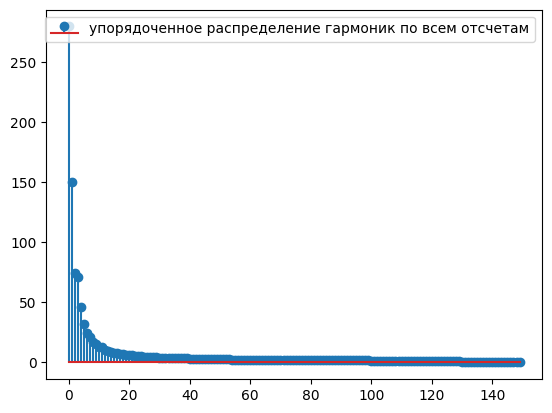

In [ ]:
#сортируем массив y и получаем индексы в возрастающем порядке
sort_yf_indices = abs(yf).argsort()

#получаем 5 элементов с самыми высосикими гармониками
#так как сортировка по возрастанию, то они в конце списка
#с помощью индекса [::-1] выводим массив в обратном порядке
print('5 значимых частот',xf[sort_yf_indices[-5::]][::-1])
print('амплитуды гармоник на 5 значимых частотах', abs(yf)[sort_yf_indices[-5::]][::-1])
yf_sort = yf[sort_yf_indices[-5::]][::-1]/N*2
xf_sort = xf[sort_yf_indices[-5::]][::-1]
plt.stem(abs(yf[sort_yf_indices[::-1]]), label='упорядоченное распределение гармоник по всем отсчетам')
plt.legend()

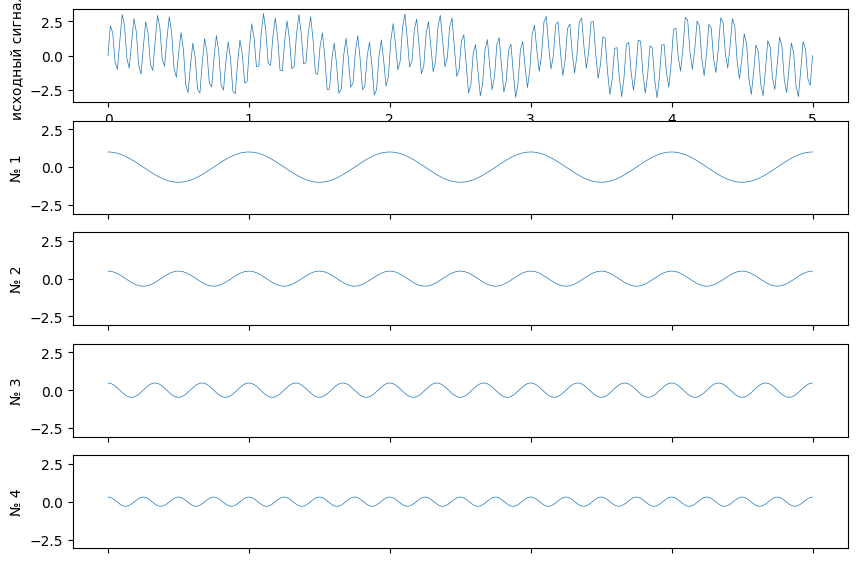

In [ ]:
plot_number = 4+1
fig, ax = plt.subplots(plot_number,1,figsize=(10,7))
ax[0].plot(t, y,linewidth = 0.5)
ax[0].set_ylabel('исходный сигнал', rotation = 90)

for i in range(1,plot_number):
    ax[i].set_ylim(np.min(y), np.max(y))
    ax[i].set_xticklabels([])
    ax[i].set_ylabel('№ %i' %i, rotation = 90)
    ax[i].plot(t, abs(yf_sort[i])*np.cos(2*np.pi*t*i),linewidth = 0.5)

In [ ]:
!pip install spectrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.6/717.6 kB 12.3 MB/s eta 0:00:00
  Created wheel for spectrum: filename=spectrum-0.8.1-cp310-cp310-linux_x86_64.whl size=236594 sha256=b1ae592dbfa796228cc41bca7b1270ef73253e85c989aa2f20c0da23766d9465
  Stored in directory: /root/.cache/pip/wheels/e7/5a/09/ffc6afdf8a5a6f58e9851292108df32bb11374e11b8705cabd
Successfully built spectrum


входной сигнал:
y = np.sin(1.0 * 2.0*np.pi*t) = sin(ωt) = sin(2*π*f t)

частота f = 1.0 Гц
круговая частота f * 2 * π рад/сек!

 f = 1/T

 ω = 2*pi/T

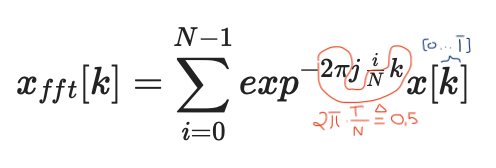

In [ ]:
import spectrum

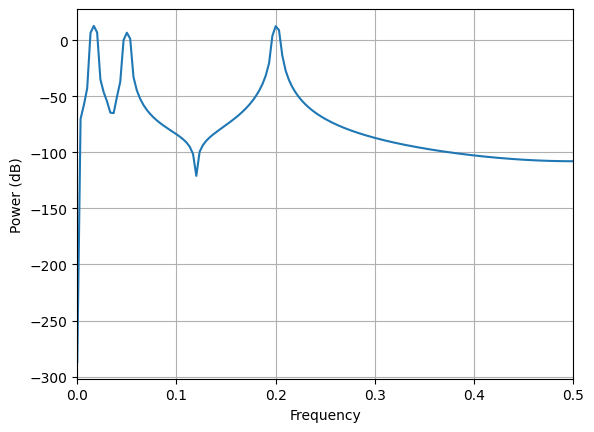

In [ ]:
#строим спект из библиотеки
#почему по оси частот видим 0.5 частоту?
p = spectrum.Periodogram(y)
p.plot()

на периодиограмме частота 0.5 и многие думают, что это 0.5 Гц - это не так.
Дело в том, что используется нормализованная частата для периодиограммы!

Нормализованная частота Ω = ω/sampling_rate

sampling_rate - это число отчетов за перидод времени.
У нас N отчетов за Т времени.
Итого: sampling_rate = T/N